# Annexe

This notebook is the annexe of the project. Here, we will discut about some of our ideas that we chose to not develop in the previous notebook.

It can be for some topics, a way to improve our work and for other some ideas that we found the result interesting to talk about.

So, let us start by importing the libraries and our data.

In [ ]:
#Library for Pre-processing
from sklearn.model_selection import train_test_split

#Library for ML models
from sklearn.ensemble import RandomForestClassifier as RF

#Our functions
%cd ..
from src.annexe import *

In [2]:
# Importation of our data
%store -r X
%store -r t_inc
%store -r t_acc

#Train = 80% % ; Test = 20 %
X_train, X_test, Inc_train, Inc_test, Acc_train, Acc_test = train_test_split(X, t_inc, t_acc, test_size=0.2, shuffle=True, random_state=0)

## Pre processing

The pre processing part was a very long part to do because we had to take a lot of decisions that would have an important impact on our models.
 
### Features transformation

First of all, we can talk about the ratio transformation. We decide to apply a ration transformation on two correleated features *FinancialEducation* and *Riskpropensity*.

We could have deleted one of these features and it would not have changed significantly the performance but we chose to apply the transformation because we wanted to keep the informations of the two features.

In addition, we decided to not transform the correlated pair features *logIncome* - *logWealth* and *logWealth* - *Age* because of their importance in the models predictions.

### PCA

We also implemented a PCA method. As we will see, it gave us unexpected results that we decided to not keep. We were expected to reduce the problem from 4 to dimension 2 or at least 3 in order to have better visualization and reduction of the problem.

Thus we will not use the PC space because it doesn't simplify the case as we already avoid the two feature by our interpretation.

Here the PCA :

first principal component direction: [ 6.90752392e-04 -4.85105492e-01  8.04708141e-01  3.42223599e-01]
explained variance: [9.97781885e-01 1.43043874e-03 5.95316356e-04 1.92359876e-04]


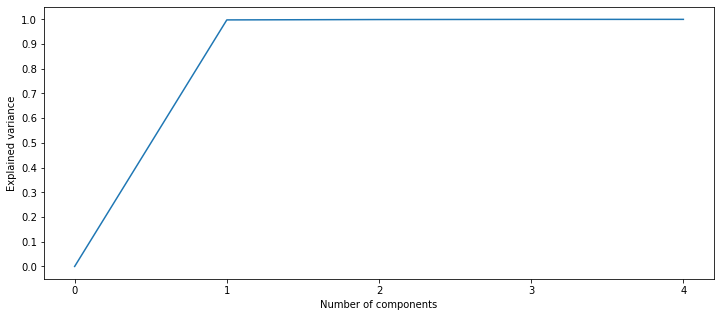

In [3]:
#Plot of the explained variance in function of the PCAs 
pcaPlot(X_train)

After the features transformation, we can see here that the number of Principal Componen Analysis is 1. Before this transformation, a good number of PCA was 4. We did not understand this abrut change which looked strange for us.

Let us plot the data to see how they look like after the PCA transformation

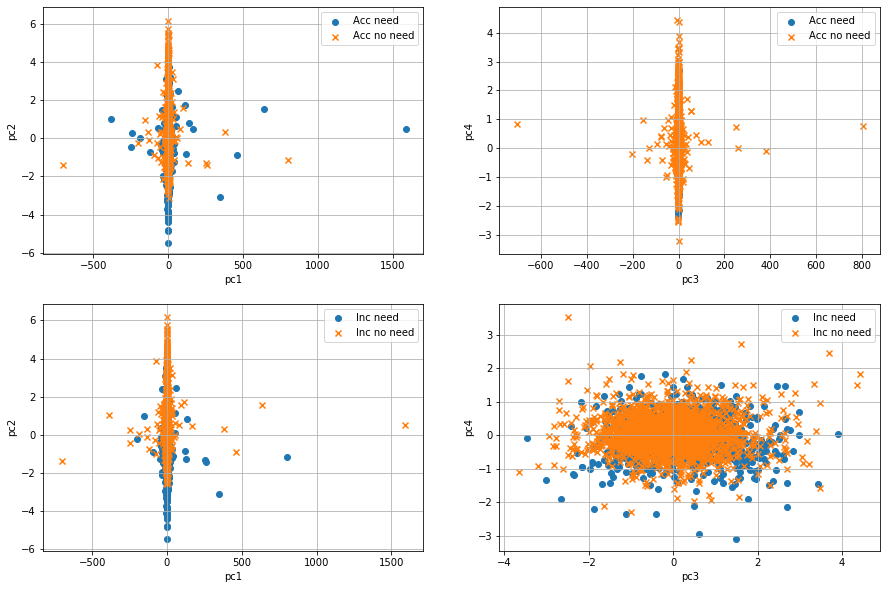

In [4]:
pca_test = PCA()
pca_test.fit(X_train)
T = pca_test.transform(X_train) 

pcaDataPlot(T, Acc_train, Inc_train)

As the precedent graph show us, we can see that all the variance can be catched by the first component for both of the target.

By looking these graphs, we were not convinced by the capability of a model to catch the good information of the first PCA to build a good model. So, what if we used this component? Let us try with a random forest and plot the result.

Measures for IncomeInvestment:
Sensitivity = 42.14% ;  Specificity = 61.28% ; Precision = 39.38% ; F1 score = 40.71% ; Accuracy = 54.12% 

Measures for AccumulationInvestment
Sensitivity = 52.81% ;  Specificity = 52.17% ; Precision = 53.60% ; F1 score = 53.20% ; Accuracy = 52.50% 



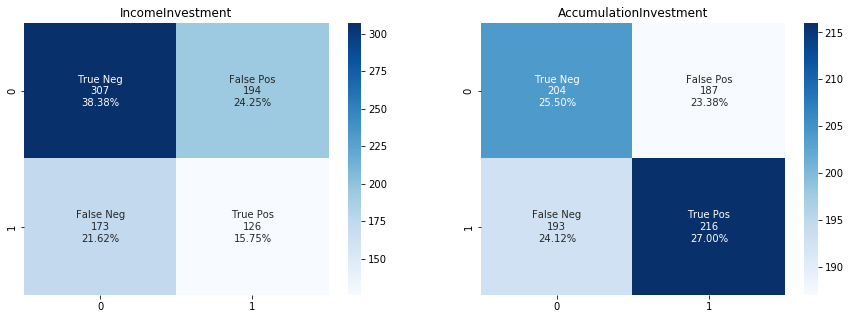

In [5]:
#Split the train test
T_train, T_test, PCAInc_train, PCAInc_test, PCAAcc_train, PCAAcc_test = train_test_split(T[:,0], Inc_train, Acc_train, test_size=0.2, shuffle=True, random_state=0)

# Train a Random Forest with the PCA
model = RF()
model.fit(T_train.reshape(-1, 1), PCAAcc_train)
pred_acc = model.predict(T_test.reshape(-1, 1))
model.fit(T_train.reshape(-1, 1), PCAInc_train)
pred_inc = model.predict(T_test.reshape(-1, 1))

# Plot the performance result
confusionMat(pred_inc, pred_acc, PCAInc_test, PCAAcc_test)

The result are not good, especially for a random forest. We probably make a good choice by not use this technique for this case.

## Models

One other interresting part was the models. Because all the response is given after testing, we try a lot of algorithm: Perceptron, K-mean, SVM,...

At the end, we chose to implement the most efficient one: Random Forest and Neural Networks. We improve them, in particular the Neural Network by apply a bagging technique and compute a better threshold to improve his result. We also needed a new metric for compare our models.

### Z-metric

We decided to use a metric that we have created. His formula is simple:
- Z = 0.6*(FN/(AP)) + 0.4*(FP/(AP))

with FN = False Negative; FP = False Positive; AP = All the Predictions;

The idea behind is to use the misclassified prediction ratio to give a score, by penalize the false negative because in a business point of view, is with this metric that we can compute the economical loss.

This is completely an arbitrary decision that we can change or improve. We also choose arbitrary the rate 0.6 and 0.4.   

### Ensemble Neural Network

In the first time, we did not success to have a very good neural network model. We try severale implementation: Differents layers, differents activation functions, ...

Then, we had the idea to *"copied"* the random forest: Implement severale different neural network train on different train set. In our case in 3 neural network with 128, 256 and 512 neural into one unique layer.

We can continue to improve the model by using different activation function, adding more layers,... We did not go so far with this model because of the time that we took to implement it.

### Threshold for the Neural Network

In [ ]:
# We created a validation subset
X_train, X_val, Inc_train, Inc_val, Acc_train, Acc_val = train_test_split(X_train, Inc_train, Acc_train, test_size=0.15, shuffle=True, random_state=5)

# We computed our predictions
predNnAcc = predictionEnsemble(nnAccMod, X_val)
predNnInc = predictionEnsemble(nnIncMod, X_val)

In [ ]:
# Then we tried some threshold and ploted the result
threshold = [0.22, 0.23, 0.24, 0.25, 0.28, 0.3, 0.33, 0.36, 0.38, 0.4, 0.44, 0.48, 5]
for t in threshold:
    iPred = (predNnInc > t).astype(int)
    aPred = (predNnAcc > t).astype(int)
    print("For ", t, " we have :")
    confusionMat(iPred, aPred, Inc_val, Acc_val)

We do not run this test because of the number of plots but at the end, we chose the best threshold according to the recall, the accuracy and our z-metric. The best one was 0.28

## Recommandation System

To finish, we will discuss about the last part of the project: build the recommandation system.

This part was the more open, we can do whatever we want. We decided to work more on the first part than the last part so our recommandation system can be discussed from the beginning to the end. 